In [1]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.gridspec import GridSpec
import scipy.optimize as spop
import scipy.interpolate as spint

In [2]:
gs = GridSpec(2,2)

n = 30

x = np.arange(n)-(n-1)/2
y = np.arange(n)-(n-1)/2
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2)
signal = 4.2*np.exp(-R**2/4)

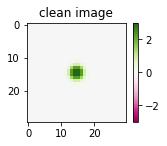

In [3]:
pl.figure()
pl.gcf().add_subplot(gs[0,0])
pl.imshow(signal,vmin=-3,vmax=3,cmap=pl.cm.PiYG)
pl.title('clean image')
pl.colorbar()

In [4]:
sigma_N = 2.1
noise = sigma_N*np.random.normal(size=signal.shape)
dat = signal+noise

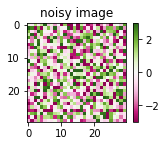

In [5]:
pl.gcf().add_subplot(gs[0,1])
pl.imshow(dat,vmin=-3,vmax=3,cmap=pl.cm.PiYG)
pl.title('noisy image')
pl.colorbar()

In [6]:
Rcounts = np.bincount(R.astype(np.int64).flatten())
Rvals = np.arange(len(Rcounts))
radpro = np.bincount(R.astype(np.int64).flatten(),dat.astype(np.int64).flatten())/Rcounts
gaussfunc = lambda x,a,b : a*np.exp(-x**2/(2*b**2))
gaussfit = spop.curve_fit(gaussfunc,Rvals,radpro,sigma=sigma_N/np.sqrt(Rcounts))

In [18]:
Rcounts

array([  4,   8,  20,  20,  28,  32,  44,  52,  48,  60,  68,  64,  92,
        76, 100,  64,  44,  36,  16,  20,   4])

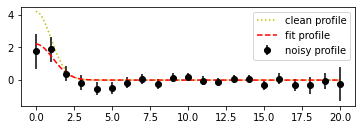

In [7]:
pl.gcf().add_subplot(gs[1,:])
Rvals_fine = np.linspace(np.min(Rvals),np.max(Rvals),len(Rvals)*10)
pl.plot(Rvals_fine,gaussfunc(Rvals_fine,4.2,1),'y:',label='clean profile')
pl.errorbar(Rvals,radpro,sigma_N/np.sqrt(Rcounts),fmt='ko',label='noisy profile')
pl.plot(Rvals_fine,gaussfunc(Rvals_fine,*gaussfit[0]),'r--',label='fit profile')
pl.legend(loc='best')

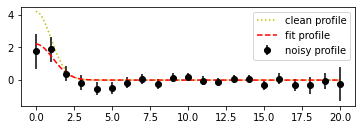

In [15]:
pl.gcf().add_subplot(gs[1,:])
Rvals_fine = np.linspace(np.min(Rvals),np.max(Rvals),len(Rvals)*10)
pl.plot(Rvals_fine ,gaussfunc(Rvals_fine,4.2,1),'y:',label='clean profile')
pl.errorbar(Rvals,radpro,sigma_N/np.sqrt(Rcounts),fmt='ko',label='noisy profile')
pl.plot(Rvals_fine,gaussfunc(Rvals_fine,*gaussfit[0]),'r--',label='fit profile')
pl.legend(loc='best')

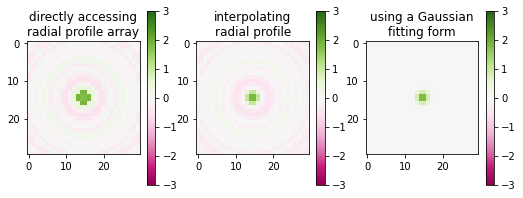

In [8]:
pl.figure(figsize=(8.6,3.2))
thumb1 = radpro[R.astype(np.int64)]
pl.subplot(131)
pl.imshow(thumb1,vmin=-3,vmax=3,cmap=pl.cm.PiYG)
pl.title('directly accessing\nradial profile array')
pl.colorbar()

thumb2 = spint.interp1d(Rvals,radpro,fill_value='extrapolate')(R)
pl.subplot(132)
pl.imshow(thumb2,vmin=-3,vmax=3,cmap=pl.cm.PiYG)
pl.title('interpolating\nradial profile')
pl.colorbar()

thumb3 = gaussfunc(R,*gaussfit[0])
pl.subplot(133)
pl.imshow(thumb3,vmin=-3,vmax=3,cmap=pl.cm.PiYG)
pl.title('using a Gaussian\nfitting form')
pl.colorbar()
pl.show()

In [16]:
Rvals

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [17]:
R

array([[20.50609665, 19.81161276, 19.14418972, 18.50675552, 17.90251379,
        17.33493582, 16.80773631, 16.32482772, 15.89024858, 15.50806242,
        15.18222645, 14.91643389, 14.71393897, 14.57737974, 14.50861813,
        14.50861813, 14.57737974, 14.71393897, 14.91643389, 15.18222645,
        15.50806242, 15.89024858, 16.32482772, 16.80773631, 17.33493582,
        17.90251379, 18.50675552, 19.14418972, 19.81161276, 20.50609665],
       [19.81161276, 19.09188309, 18.39836949, 17.73414785, 17.10263138,
        16.50757402, 15.95305613, 15.44344521, 14.98332406, 14.57737974,
        14.23024947, 13.94632568, 13.72953022, 13.58307771, 13.50925609,
        13.50925609, 13.58307771, 13.72953022, 13.94632568, 14.23024947,
        14.57737974, 14.98332406, 15.44344521, 15.95305613, 16.50757402,
        17.10263138, 17.73414785, 18.39836949, 19.09188309, 19.81161276],
       [19.14418972, 18.39836949, 17.67766953, 16.98528775, 16.32482772,
        15.70031847, 15.11621646, 14.57737974, 14